In [68]:
import pandas as pd

In [69]:
# Lectura del DataFrame

df_viajes_ocasionales = pd.read_csv('../data/raw/viajes_ocasionales.csv', sep=';')
df_viajes_ocasionales.head()

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,...,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,...,34.0,106.0,100.0,15.0,26.0,25.0,117.0,146.0,44.0,64.0
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,...,110.0,139.0,100.0,69.0,169.0,158.0,263.0,132.0,161.0,436.0
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,...,1064.0,2086.0,1522.0,973.0,1574.0,6450.0,1901.0,1299.0,1144.0,1421.0
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,...,933.0,1653.0,1569.0,935.0,1485.0,1613.0,2496.0,1403.0,1629.0,2040.0
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,...,899.0,1069.0,1850.0,749.0,1116.0,1644.0,1772.0,1465.0,1200.0,1631.0


In [70]:
# Eliminar espacios adicionales en los nombres de columnas
df_viajes_ocasionales.columns = df_viajes_ocasionales.columns.str.strip()

df_viajes_ocasionales.head()

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,...,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,...,34.0,106.0,100.0,15.0,26.0,25.0,117.0,146.0,44.0,64.0
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,...,110.0,139.0,100.0,69.0,169.0,158.0,263.0,132.0,161.0,436.0
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,...,1064.0,2086.0,1522.0,973.0,1574.0,6450.0,1901.0,1299.0,1144.0,1421.0
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,...,933.0,1653.0,1569.0,935.0,1485.0,1613.0,2496.0,1403.0,1629.0,2040.0
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,...,899.0,1069.0,1850.0,749.0,1116.0,1644.0,1772.0,1465.0,1200.0,1631.0


In [71]:
# Transformación a int

meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre','diciembre']
for mes in meses:
    df_viajes_ocasionales[mes] = df_viajes_ocasionales[mes].round(0).astype('Int64')

df_viajes_ocasionales.head()

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,...,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,...,34,106,100,15,26,25,117,146,44,64
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,...,110,139,100,69,169,158,263,132,161,436
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,...,1064,2086,1522,973,1574,6450,1901,1299,1144,1421
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,...,933,1653,1569,935,1485,1613,2496,1403,1629,2040
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,...,899,1069,1850,749,1116,1644,1772,1465,1200,1631


In [72]:
# Aplanar viajes ocasionales por mes.
# id_vars -> Lista de columnas que no se van a transformar (se mantendrán como están)
# value_vars -> Lista de columnas que representan los meses. Estas columnas se "aplanarán" en la nueva columna llamada "Mes"

df_viajes_ocasionales = pd.melt(df_viajes_ocasionales, 
                      id_vars=[ 'CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen',
                                'Provincia Origen', 'CUT Region Origen', 'Region Origen',
                                'CUT Comuna Destino', 'Comuna Destino', 'Destino Turistico',
                                'CUT Provincia Destino', 'Provincia Destino', 'CUT Region Destino',
                                'Region Destino', 'Anio'],
                      value_vars=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 
                                  'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
                      var_name='Mes', 
                      value_name='Viajes Ocasionales')

df_viajes_ocasionales.head()


,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,Mes,Viajes Ocasionales
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,enero,109
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,enero,298
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,enero,2594
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,enero,4138
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,enero,2071


In [73]:
# identificar los meses con números

meses = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}
# Crear una columna

df_viajes_ocasionales['CUT Mes'] = df_viajes_ocasionales['Mes'].map(meses)

# Ordenar columnas para que quede CUT Mes a la izq. de Mes

columnas = [
    'CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen', 'Provincia Origen',
    'CUT Region Origen', 'Region Origen', 'CUT Comuna Destino', 'Comuna Destino', 
    'Destino Turistico', 'CUT Provincia Destino', 'Provincia Destino', 'CUT Region Destino',
    'Region Destino', 'Anio', 'CUT Mes', 'Mes', 'Viajes Ocasionales'
]

df_viajes_ocasionales = df_viajes_ocasionales[columnas]

df_viajes_ocasionales.head()

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,1,enero,109
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,1,enero,298
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,2071


In [74]:
#Calculando el total de viajes ocasionales por Region de destino y mes

viajes_por_mes_region = df_viajes_ocasionales.groupby(['CUT Region Destino','Region Destino','Mes'])['Viajes Ocasionales'].sum().reset_index()

viajes_por_mes_region

,CUT Region Destino,Region Destino,Mes,Viajes Ocasionales
0,1,Tarapacá,abril,175466
1,1,Tarapacá,agosto,213382
2,1,Tarapacá,diciembre,260579
3,1,Tarapacá,enero,404405
4,1,Tarapacá,febrero,375224
...,...,...,...,...
187,16,Ñuble,marzo,496604
188,16,Ñuble,mayo,404892
189,16,Ñuble,noviembre,441557
190,16,Ñuble,octubre,511155


In [75]:
# Calcular estadísticas descriptivas por región
estadisticas = viajes_por_mes_region.groupby('CUT Region Destino')['Viajes Ocasionales'].agg(['mean', 'std']).reset_index()
estadisticas.rename(columns={'mean': 'Media', 'std': 'Desviacion'}, inplace=True)

# Unir estadísticas con el DataFrame de viajes por mes y región
viajes_por_mes_region = viajes_por_mes_region.merge(estadisticas, on='CUT Region Destino')


In [76]:
# Definir la lógica para identificar temporadas
def identificar_temporada(row):
    if row['Viajes Ocasionales'] > (row['Media'] + row['Desviacion']):
        return 'Alta'
    elif row['Viajes Ocasionales'] < (row['Media'] - row['Desviacion']):
        return 'Baja'
    else:
        return 'Media'

# Aplicar la función para crear una nueva columna de temporada
viajes_por_mes_region['Temporada'] = viajes_por_mes_region.apply(identificar_temporada, axis=1)

viajes_por_mes_region


,CUT Region Destino,Region Destino,Mes,Viajes Ocasionales,Media,Desviacion,Temporada
0,1,Tarapacá,abril,175466,251473.416667,79370.947638,Media
1,1,Tarapacá,agosto,213382,251473.416667,79370.947638,Media
2,1,Tarapacá,diciembre,260579,251473.416667,79370.947638,Media
3,1,Tarapacá,enero,404405,251473.416667,79370.947638,Alta
4,1,Tarapacá,febrero,375224,251473.416667,79370.947638,Alta
...,...,...,...,...,...,...,...
187,16,Ñuble,marzo,496604,619940.166667,295381.969961,Media
188,16,Ñuble,mayo,404892,619940.166667,295381.969961,Media
189,16,Ñuble,noviembre,441557,619940.166667,295381.969961,Media
190,16,Ñuble,octubre,511155,619940.166667,295381.969961,Media


/var/folders/3p/lzyp6b9542b_8mk_q04l5p100000gn/T/ipykernel_1694/3519162853.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=viajes_por_mes_region, x='Mes', y='Viajes Ocasionales', hue='Region Destino', ci=None)


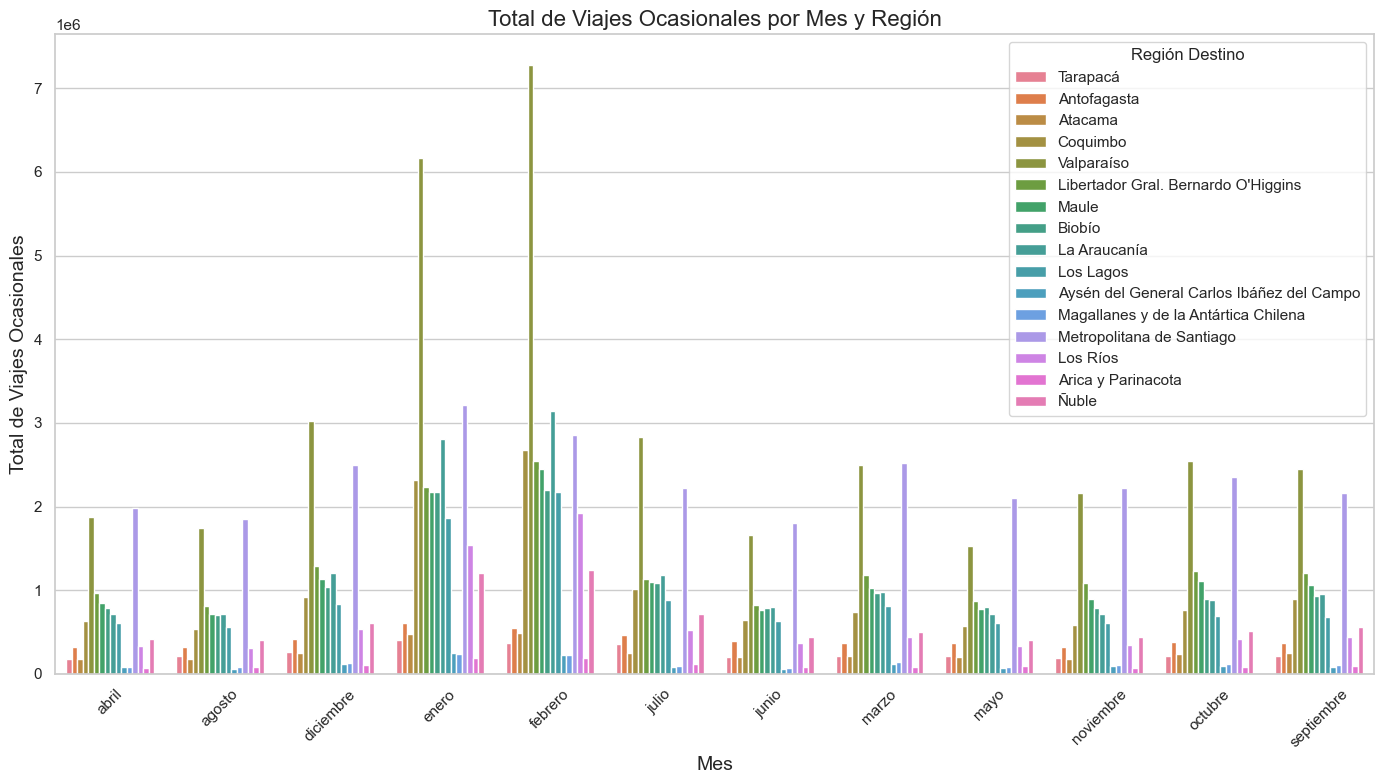

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.barplot(data=viajes_por_mes_region, x='Mes', y='Viajes Ocasionales', hue='Region Destino', ci=None)

# Configurar título y etiquetas
plt.title('Total de Viajes Ocasionales por Mes y Región', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Total de Viajes Ocasionales', fontsize=14)
plt.xticks(rotation=45)  # Rotar los nombres de los meses para mejor legibilidad
plt.legend(title='Región Destino')

plt.tight_layout()
plt.show()

In [78]:
# Lectura DataFrame Pib Regional

df_pib_regional = pd.read_csv('../data/raw/pib_regional.csv', sep=';')
df_pib_regional.head()

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana de Santiago,Libertador Gral. Bernardo O'Higgins,Maule,Ñuble,Biobío,La Araucanía,Los Ríos,Los Lagos,Aysén del General Carlos Ibáñez del Campo,Magallanes y de la Antártica Chilena
0,2013-01-01,278.304651,811.931803,3759.318361,871.758026,1426.567416,3339.833326,16843.137386,1931.429678,1599.502893,634.644423,2301.626148,1172.639779,523.442501,1208.470375,282.046799,387.047791
1,2013-04-01,306.132341,926.814620,3949.000465,845.358870,1413.417680,3371.955157,17862.986368,1708.125163,1610.473179,650.654310,2475.065928,1068.709189,520.977785,1237.106367,272.044536,386.397966
2,2013-07-01,338.475536,1044.963002,3792.362453,867.192979,1341.707470,3190.091221,17184.745420,1504.860461,1285.815102,553.334016,2404.948751,1006.802439,492.418296,1147.297226,265.659402,379.493237
3,2013-10-01,321.351073,1135.992471,4133.677309,975.218096,1436.152081,3438.771257,18822.236849,1694.010822,1467.454453,599.951505,2532.224807,1084.623743,533.889209,1311.711077,279.318343,431.384039
4,2014-01-01,285.116735,977.620431,3803.705319,905.985208,1386.119006,3271.999963,17350.239851,1934.947837,1583.320053,627.795167,2394.915803,1175.242401,543.005670,1279.226153,276.013977,435.493723


In [79]:
# Convertir la columna de Fecha a tipo datetime
df_pib_regional['Fecha'] = pd.to_datetime(df_pib_regional['Fecha'])
df_pib_regional.head()

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana de Santiago,Libertador Gral. Bernardo O'Higgins,Maule,Ñuble,Biobío,La Araucanía,Los Ríos,Los Lagos,Aysén del General Carlos Ibáñez del Campo,Magallanes y de la Antártica Chilena
0,2013-01-01,278.304651,811.931803,3759.318361,871.758026,1426.567416,3339.833326,16843.137386,1931.429678,1599.502893,634.644423,2301.626148,1172.639779,523.442501,1208.470375,282.046799,387.047791
1,2013-04-01,306.132341,926.814620,3949.000465,845.358870,1413.417680,3371.955157,17862.986368,1708.125163,1610.473179,650.654310,2475.065928,1068.709189,520.977785,1237.106367,272.044536,386.397966
2,2013-07-01,338.475536,1044.963002,3792.362453,867.192979,1341.707470,3190.091221,17184.745420,1504.860461,1285.815102,553.334016,2404.948751,1006.802439,492.418296,1147.297226,265.659402,379.493237
3,2013-10-01,321.351073,1135.992471,4133.677309,975.218096,1436.152081,3438.771257,18822.236849,1694.010822,1467.454453,599.951505,2532.224807,1084.623743,533.889209,1311.711077,279.318343,431.384039
4,2014-01-01,285.116735,977.620431,3803.705319,905.985208,1386.119006,3271.999963,17350.239851,1934.947837,1583.320053,627.795167,2394.915803,1175.242401,543.005670,1279.226153,276.013977,435.493723


In [80]:
# Aplanar el DataFrame de PIB
df_pib_regional= pd.melt(df_pib_regional, id_vars=['Fecha'], var_name='Region', value_name='PIB')
df_pib_regional

,Fecha,Region,PIB
0,2013-01-01,Arica y Parinacota,278.304651
1,2013-04-01,Arica y Parinacota,306.132341
2,2013-07-01,Arica y Parinacota,338.475536
3,2013-10-01,Arica y Parinacota,321.351073
4,2014-01-01,Arica y Parinacota,285.116735
...,...,...,...
731,2023-04-01,Magallanes y de la Antártica Chilena,468.905582
732,2023-07-01,Magallanes y de la Antártica Chilena,442.940103
733,2023-10-01,Magallanes y de la Antártica Chilena,496.159006
734,2024-01-01,Magallanes y de la Antártica Chilena,498.067054


In [81]:
# Extraer año y mes y guardarlo en columnas separadas

df_pib_regional['Anio'] = df_pib_regional['Fecha'].dt.year
df_pib_regional['Mes'] = df_pib_regional['Fecha'].dt.month
df_pib_regional.head()

,Fecha,Region,PIB,Anio,Mes
0,2013-01-01,Arica y Parinacota,278.304651,2013,1
1,2013-04-01,Arica y Parinacota,306.132341,2013,4
2,2013-07-01,Arica y Parinacota,338.475536,2013,7
3,2013-10-01,Arica y Parinacota,321.351073,2013,10
4,2014-01-01,Arica y Parinacota,285.116735,2014,1


In [82]:
# Convertir de int32 a int64
df_pib_regional['Anio'] = df_pib_regional['Anio'].astype('int64')

In [83]:
# Diccionario de meses

meses_dict = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Reemplazar números de meses con nombres
df_pib_regional['Mes'] = df_pib_regional['Mes'].map(meses_dict)
df_pib_regional.drop
# Mostrar el DataFrame resultante
df_pib_regional

,Fecha,Region,PIB,Anio,Mes
0,2013-01-01,Arica y Parinacota,278.304651,2013,enero
1,2013-04-01,Arica y Parinacota,306.132341,2013,abril
2,2013-07-01,Arica y Parinacota,338.475536,2013,julio
3,2013-10-01,Arica y Parinacota,321.351073,2013,octubre
4,2014-01-01,Arica y Parinacota,285.116735,2014,enero
...,...,...,...,...,...
731,2023-04-01,Magallanes y de la Antártica Chilena,468.905582,2023,abril
732,2023-07-01,Magallanes y de la Antártica Chilena,442.940103,2023,julio
733,2023-10-01,Magallanes y de la Antártica Chilena,496.159006,2023,octubre
734,2024-01-01,Magallanes y de la Antártica Chilena,498.067054,2024,enero


In [84]:
df_viajes_ocasionales['Region Origen'].unique()

array(['Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo', 'Valparaíso',
       "Libertador Gral. Bernardo O'Higgins", 'Maule', 'Biobío',
       'La Araucanía', 'Los Lagos',
       'Aysén del General Carlos Ibáñez del Campo',
       'Magallanes y de la Antártica Chilena',
       'Metropolitana de Santiago', 'Los Ríos', 'Arica y Parinacota',
       'Ñuble'], dtype=object)

In [85]:
df_pib_regional['Region'].unique()

array(['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Metropolitana de Santiago',
       "Libertador Gral. Bernardo O'Higgins", 'Maule', 'Ñuble', 'Biobío',
       'La Araucanía', 'Los Ríos', 'Los Lagos',
       'Aysén del General Carlos Ibáñez del Campo',
       'Magallanes y de la Antártica Chilena'], dtype=object)

In [86]:
# Busqueda en DataFrame pib_regional

def buscar_pib(region, anio, mes):

    # Cambio de los meses, pib_regional trimestral
    
    if mes in ['febrero', 'marzo']:
        mes = 'enero'
    elif mes in ['mayo', 'junio']:
        mes = 'abril'
    elif mes in ['agosto', 'septiembre']:
        mes = 'julio'
    elif mes in ['noviembre', 'diciembre']:
        mes = 'octubre'

    # Filtrar el DataFrame para encontrar la fila correspondiente

    pib_row = df_pib_regional.loc[
        (df_pib_regional['Region'] == region) & 
        (df_pib_regional['Anio'] == anio) & 
        (df_pib_regional['Mes'] == mes)
    ]

    if not pib_row.empty:
        # Devolver el PIB correspondiente
        return pib_row.iloc[0]['PIB']
    
    return None  # Retornar None si no se encuentra

In [87]:
df_viajes_ocasionales['PIB Region Origen'] = df_viajes_ocasionales.apply(
    lambda row: buscar_pib(row['Region Origen'], row['Anio'], row['Mes']),
    axis=1)
df_viajes_ocasionales

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales,PIB Region Origen
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,1,enero,109,1061.580205
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,1,enero,298,1061.580205
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594,1061.580205
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138,1061.580205
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,2071,1061.580205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489667,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,Itata,16,Ñuble,2024,12,diciembre,<NA>,NaN
6489668,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,Itata,16,Ñuble,2024,12,diciembre,<NA>,NaN
6489669,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,Punilla,16,Ñuble,2024,12,diciembre,<NA>,NaN
6489670,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,Punilla,16,Ñuble,2024,12,diciembre,<NA>,NaN


In [88]:
df_viajes_ocasionales['PIB Region Destino'] = df_viajes_ocasionales.apply(
    lambda row: buscar_pib(row['Region Destino'], row['Anio'], row['Mes']),
    axis=1)
df_viajes_ocasionales

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales,PIB Region Origen,PIB Region Destino
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,1,enero,109,1061.580205,1061.580205
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,1,enero,298,1061.580205,1061.580205
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594,1061.580205,1061.580205
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138,1061.580205,1061.580205
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,2071,1061.580205,3724.530431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489667,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,Itata,16,Ñuble,2024,12,diciembre,<NA>,NaN,NaN
6489668,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,Itata,16,Ñuble,2024,12,diciembre,<NA>,NaN,NaN
6489669,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,Punilla,16,Ñuble,2024,12,diciembre,<NA>,NaN,NaN
6489670,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,Punilla,16,Ñuble,2024,12,diciembre,<NA>,NaN,NaN


In [89]:
df_viajes_ocasionales.to_csv('../data/raw/2-ExploracionDataframes.csv', sep=';', index=False)